# Exercise M4.02

The aim of this notebook is to train a linear regression algorithm on a dataset with more than a single feature.  
We will work with house prices in California dataset. The dataset consists of 8 features regarding the demography and geography of districts in California and the aim is to predict the median house price of each district.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100 # rescale the target in k$
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9318,6.4271,34.0,7.218391,1.022989,460.0,2.643678,37.98,-122.49
2762,1.2639,16.0,7.424242,1.727273,81.0,2.454545,33.19,-116.00
18206,4.2719,20.0,3.547934,1.051240,2389.0,1.974380,37.38,-122.06
9553,2.5670,21.0,5.091935,1.027419,2268.0,3.658065,37.38,-120.64
541,3.7500,27.0,4.137681,1.110766,1901.0,1.967909,37.77,-122.28


Now it is time to train a linear regression model on this dataset.

In [2]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

No need to fit the model if we are using cross validation, since it takes care of it.

In [3]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(linear_regression, data, target,
                         scoring="neg_mean_absolute_error",
                       cv=10, return_estimator=True, n_jobs=2)

Let's see what `cv_results` contains:

In [4]:
cv_results

{'fit_time': array([0.01542401, 0.01526308, 0.01000905, 0.0092032 , 0.00773811,
        0.01268196, 0.01511407, 0.01249003, 0.00926018, 0.01033807]),
 'score_time': array([0.00363994, 0.00363493, 0.00272226, 0.00216699, 0.001863  ,
        0.00308871, 0.01165295, 0.00365424, 0.00200295, 0.00287008]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([-53.51667968, -52.91050431, -67.85147748, -47.48574496,
        -65.19784225, -50.0921865 , -39.62986083, -64.00626799,
        -60.28617579, -43.54469953])}

In [5]:
scores = -cv_results['test_score']
print(f"Mean absolute error on testing set: "
      f"{scores.mean():.3f} k$ +/- {scores.std():.3f}")

Mean absolute error on testing set: 54.452 k$ +/- 9.109


Values of the coefficients returned from the cross validation are saved in `estimator`:

In [9]:
weights = [est.coef_ for est in cv_results['estimator']]
weights = pd.DataFrame(weights, columns=data.columns)

In [12]:
weights

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,44.613222,1.073691,-12.817547,81.709895,-0.000448,-0.378220,-45.087728,-47.999610
1,42.847135,0.943540,-9.783829,60.456816,-0.000889,-0.412785,-40.634870,-42.380996
2,42.647915,0.925298,-7.777559,50.807236,-0.000674,-0.338461,-41.126288,-43.165241
3,43.824437,0.996925,-11.607237,68.100196,-0.000542,-0.355432,-42.755030,-43.586643
4,42.629253,0.907493,-9.490222,57.837555,0.000321,-0.348858,-42.324285,-44.153669
5,44.701461,1.030609,-12.514147,70.626398,0.000484,-0.377876,-42.338749,-43.813873
6,43.819324,0.991483,-11.009958,66.325882,-0.000115,-0.377828,-41.728694,-42.641354
7,42.804521,0.635488,-8.885036,54.303107,-0.001602,-0.336350,-41.397068,-40.638396
8,43.988381,0.900403,-11.235413,66.441588,-0.000417,-0.426301,-40.904361,-41.506513
9,44.244087,0.984846,-11.385470,68.111843,-0.000169,-0.561852,-43.198393,-44.659096


In [20]:
weights.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43.611974,0.938978,-10.650642,64.472052,-0.000405,-0.391396,-42.149547,-43.454539
std,0.813154,0.119980,1.618097,8.938181,0.000598,0.066839,1.325018,2.010166
min,42.629253,0.635488,-12.817547,50.807236,-0.001602,-0.561852,-45.087728,-47.999610
25%,42.815174,0.911945,-11.551795,58.492370,-0.000641,-0.404144,-42.650960,-44.068720
50%,43.821881,0.964193,-11.122685,66.383735,-0.000433,-0.377852,-42.026490,-43.375942
75%,44.180161,0.995565,-9.563624,68.108931,-0.000128,-0.350502,-41.193983,-42.446086
max,44.701461,1.073691,-7.777559,81.709895,0.000484,-0.336350,-40.634870,-40.638396


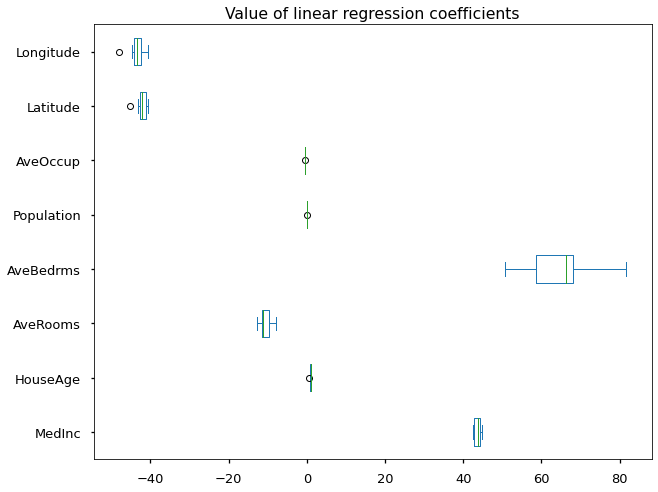

In [24]:
weights.plot.box(vert=False, style='seaborn-poster', figsize=(10,8))
plt.title("Value of linear regression coefficients");